# Downloading the dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

c:\Users\seboc\anaconda3\envs\bookrecommender\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\seboc\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


# Reading the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_books = pd.read_csv(f"{path}/books.csv")

In [4]:
df_books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


# Inspecting the data

In [5]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


## BASIC OVERVIEW

In [6]:
# 1. BASIC OVERVIEW
print("\n📊 BASIC DATAFRAME INFO")
print("-" * 30)
print(f"Shape: {df_books.shape}")
print(f"Total entries: {len(df_books)}")
print(f"Memory usage: {df_books.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📊 BASIC DATAFRAME INFO
------------------------------
Shape: (6810, 12)
Total entries: 6810
Memory usage: 6.46 MB


## MISSING VALUES ANALYSIS

In [7]:
# 2. MISSING VALUES ANALYSIS
print("\n🔍 MISSING VALUES ANALYSIS")
print("-" * 30)
missing_stats = pd.DataFrame({
    'Missing_Count': df_books.isnull().sum(),
    'Missing_Percentage': (df_books.isnull().sum() / len(df_books)) * 100,
    'Data_Type': df_books.dtypes
})
missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_stats)


🔍 MISSING VALUES ANALYSIS
------------------------------
                Missing_Count  Missing_Percentage Data_Type
subtitle                 4429           65.036711    object
thumbnail                 329            4.831131    object
description               262            3.847283    object
categories                 99            1.453744    object
authors                    72            1.057269    object
average_rating             43            0.631424   float64
num_pages                  43            0.631424   float64
ratings_count              43            0.631424   float64
published_year              6            0.088106   float64


## NUMERICAL COLUMNS ANALYSIS

In [8]:
# 3. NUMERICAL COLUMNS ANALYSIS
print("\n📈 NUMERICAL COLUMNS STATISTICS")
print("-" * 30)
numerical_cols = ['isbn13', 'published_year', 'average_rating', 'num_pages', 'ratings_count']

# Basic descriptive statistics
print("Basic Statistics:")
print(df_books[numerical_cols].describe())

print("\nAdditional Numerical Statistics:")
for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Mean: {df_books[col].mean():.2f}")
    print(f"  Median: {df_books[col].median():.2f}")
    print(f"  Mode: {df_books[col].mode().iloc[0] if not df_books[col].mode().empty else 'No mode'}")
    print(f"  Standard Deviation: {df_books[col].std():.2f}")
    print(f"  Variance: {df_books[col].var():.2f}")
    print(f"  Skewness: {df_books[col].skew():.2f}")
    print(f"  Kurtosis: {df_books[col].kurtosis():.2f}")
    print(f"  Range: {df_books[col].max() - df_books[col].min():.2f}")
    print(f"  IQR: {df_books[col].quantile(0.75) - df_books[col].quantile(0.25):.2f}")



📈 NUMERICAL COLUMNS STATISTICS
------------------------------
Basic Statistics:
             isbn13  published_year  average_rating    num_pages  \
count  6.810000e+03     6804.000000     6767.000000  6767.000000   
mean   9.780677e+12     1998.630364        3.933284   348.181026   
std    6.068911e+08       10.484257        0.331352   242.376783   
min    9.780002e+12     1853.000000        0.000000     0.000000   
25%    9.780330e+12     1996.000000        3.770000   208.000000   
50%    9.780553e+12     2002.000000        3.960000   304.000000   
75%    9.780810e+12     2005.000000        4.130000   420.000000   
max    9.789042e+12     2019.000000        5.000000  3342.000000   

       ratings_count  
count   6.767000e+03  
mean    2.106910e+04  
std     1.376207e+05  
min     0.000000e+00  
25%     1.590000e+02  
50%     1.018000e+03  
75%     5.992500e+03  
max     5.629932e+06  

Additional Numerical Statistics:

ISBN13:
  Mean: 9780676621541.42
  Median: 9780553108095.50
  Mo

## CATEGORICAL COLUMNS ANALYSIS

In [9]:
# 4. CATEGORICAL COLUMNS ANALYSIS
print("\n📝 CATEGORICAL COLUMNS STATISTICS")
print("-" * 30)
categorical_cols = ['isbn10', 'title', 'subtitle', 'authors', 'categories', 'thumbnail', 'description']

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {df_books[col].nunique()}")
    print(f"  Most frequent: {df_books[col].mode().iloc[0] if not df_books[col].mode().empty else 'N/A'}")
    print(f"  Most frequent count: {df_books[col].value_counts().iloc[0] if len(df_books[col].value_counts()) > 0 else 0}")
    
    # Top 5 most frequent values
    print(f"  Top 5 values:")
    top_5 = df_books[col].value_counts().head(5)
    for idx, (value, count) in enumerate(top_5.items(), 1):
        # Truncate long strings for display
        display_value = str(value)[:50] + "..." if len(str(value)) > 50 else str(value)
        print(f"    {idx}. '{display_value}' ({count} times)")


📝 CATEGORICAL COLUMNS STATISTICS
------------------------------

ISBN10:
  Unique values: 6810
  Most frequent: 0002005883
  Most frequent count: 1
  Top 5 values:
    1. '0002005883' (1 times)
    2. '0751370738' (1 times)
    3. '0751333328' (1 times)
    4. '0750937254' (1 times)
    5. '0750666005' (1 times)

TITLE:
  Unique values: 6398
  Most frequent: The Lord of the Rings
  Most frequent count: 11
  Top 5 values:
    1. 'The Lord of the Rings' (11 times)
    2. 'Three Complete Novels' (8 times)
    3. 'Star Wars' (7 times)
    4. 'One Hundred Years of Solitude' (6 times)
    5. 'The Fellowship of the Ring' (5 times)

SUBTITLE:
  Unique values: 2009
  Most frequent: A Novel
  Most frequent count: 226
  Top 5 values:
    1. 'A Novel' (226 times)
    2. 'Stories' (17 times)
    3. 'A Memoir' (14 times)
    4. 'A Biography' (10 times)
    5. 'A Play' (7 times)

AUTHORS:
  Unique values: 3780
  Most frequent: Agatha Christie
  Most frequent count: 37
  Top 5 values:
    1. 'Agatha 

In [10]:
# 5. DATA QUALITY CHECKS
print("\n🔧 DATA QUALITY CHECKS")
print("-" * 30)

# Check for duplicates
print(f"Duplicate rows: {df_books.duplicated().sum()}")

# Check for potential data issues
print(f"\nPotential Data Issues:")
print(f"  - Books with 0 pages: {(df_books['num_pages'] == 0).sum()}")
print(f"  - Books with rating > 5: {(df_books['average_rating'] > 5).sum()}")
print(f"  - Books with rating < 1: {(df_books['average_rating'] < 1).sum()}")
print(f"  - Books published before 1000: {(df_books['published_year'] < 1000).sum()}")
print(f"  - Books published in future: {(df_books['published_year'] > 2024).sum()}")


🔧 DATA QUALITY CHECKS
------------------------------
Duplicate rows: 0

Potential Data Issues:
  - Books with 0 pages: 4
  - Books with rating > 5: 0
  - Books with rating < 1: 10
  - Books published before 1000: 0
  - Books published in future: 0


In [11]:
# 7. SUMMARY BY CATEGORIES (if categories column exists and has data)
if 'categories' in df_books.columns and df_books['categories'].notna().sum() > 0:
    print("\n📚 SUMMARY BY CATEGORIES")
    print("-" * 30)
    
    # Split categories and create expanded analysis
    # Assuming categories might be separated by commas or semicolons
    categories_expanded = df_books['categories'].str.split('[,;]', expand=True).stack().str.strip()
    categories_counts = categories_expanded.value_counts().head(10)
    print("Top 10 Categories:")
    print(categories_counts)
    
    # Average rating by top categories
    print("\nAverage Rating by Top 5 Categories:")
    top_5_categories = categories_counts.head(5).index
    for category in top_5_categories:
        mask = df_books['categories'].str.contains(category, na=False)
        avg_rating = df_books[mask]['average_rating'].mean()
        print(f"  {category}: {avg_rating:.2f}")


📚 SUMMARY BY CATEGORIES
------------------------------
Top 10 Categories:
Fiction                      2588
Juvenile Fiction              538
Biography & Autobiography     401
History                       266
Literary Criticism            166
Philosophy                    162
Comics & Graphic Novels       159
Religion                      137
Drama                         132
Juvenile Nonfiction           116
Name: count, dtype: int64

Average Rating by Top 5 Categories:
  Fiction: 3.89
  Juvenile Fiction: 3.95
  Biography & Autobiography: 3.99
  History: 3.92
  Literary Criticism: 3.90


In [12]:
# 8. PUBLICATION YEAR ANALYSIS
print("\n📅 PUBLICATION YEAR ANALYSIS")
print("-" * 30)
if 'published_year' in df_books.columns:
    year_stats = df_books['published_year'].describe()
    print(f"Earliest book: {int(df_books['published_year'].min())}")
    print(f"Latest book: {int(df_books['published_year'].max())}")
    print(f"Most common publication year: {int(df_books['published_year'].mode().iloc[0])}")
    
    # Books per decade
    df_books['decade'] = (df_books['published_year'] // 10) * 10
    decade_counts = df_books['decade'].value_counts().sort_index(ascending=False)
    print("\nBooks per decade (last 10 decades):")
    print(decade_counts)

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)


📅 PUBLICATION YEAR ANALYSIS
------------------------------
Earliest book: 1853
Latest book: 2019
Most common publication year: 2006

Books per decade (last 10 decades):
decade
2010.0      47
2000.0    4302
1990.0    1658
1980.0     450
1970.0     156
1960.0     106
1950.0      47
1940.0      20
1930.0       6
1920.0       6
1910.0       1
1900.0       2
1870.0       2
1850.0       1
Name: count, dtype: int64

ANALYSIS COMPLETE


# Analysing if missingness is biased in someway

It is important to check if missing values have a pattern because this can imply some sort of bias -> If you find that the missing values are linked to a particular characteristics 

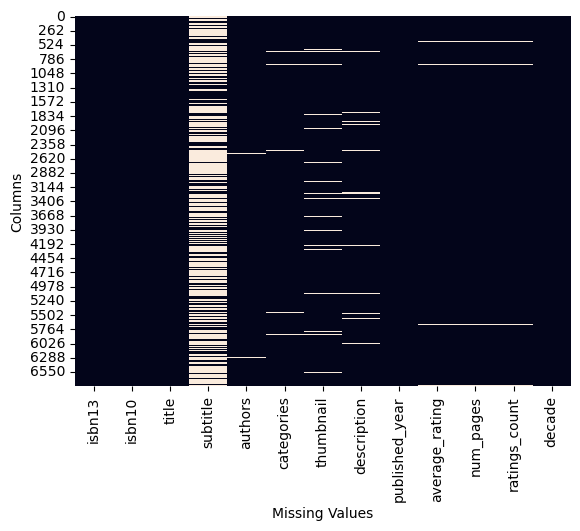

In [13]:
ax = plt.axes()
sns.heatmap(df_books.isna(), cbar=False, ax=ax)

plt.xlabel("Missing Values")
plt.ylabel("Columns")

plt.show()

If we look at the variables average_rating, num_pages, ratings_count are correlated -> **Observations that have one of them missing have all of them missing**

# Taking a closer look to all the books where the description is missing

Why especifically the description column? Because that is the one I'm gonna be using for all the natural lenguaghe processing work. It is important to know whether there is any bias in the typr of description taht we have missing, we are goona get rid of these books and I need to know if the recommender will skew towars certyain types of books.

In [14]:
df_books["missing_description"] = np.where(df_books["description"].isna(),1,0)
df_books["age_of_book"] = 2025 - df_books["published_year"]

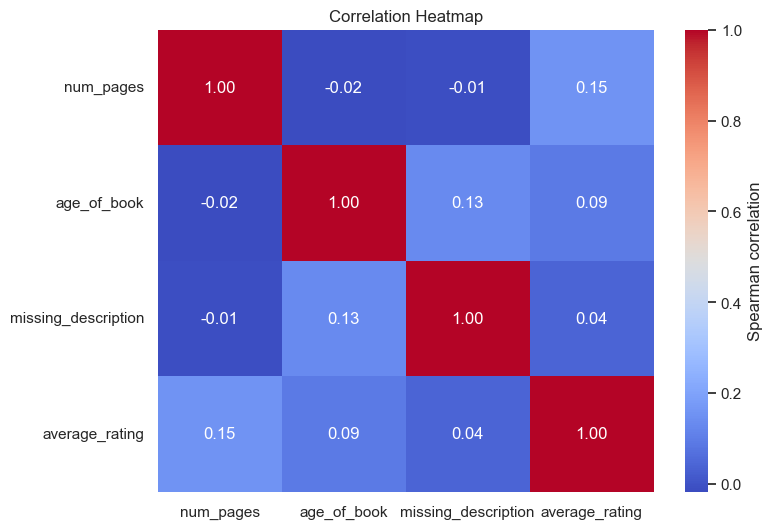

In [15]:
columns_of_interest = ["num_pages","age_of_book","missing_description","average_rating"]

correlation_matrix = df_books[columns_of_interest].corr(method="spearman")


sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",cbar_kws={"label":"Spearman correlation"})
heatmap.set_title("Correlation Heatmap")
plt.show()

We can see that any of the variables has a correlation with the missing_description

# 🗑️ Delete all books with missing descriptions


My intention is to delete all the books taht have the description missing. But first I need to check how many books will be deleted.

In [16]:
df_books.loc[(df_books["description"].isna()) | (df_books["num_pages"].isna()) | (df_books["average_rating"].isna()) |(df_books["published_year"].isna())].shape

(303, 15)

Since the numbers of rows is 303 (less than 5% of the whole dataset, I can delete it)

In [18]:
df_books_without_missing_description = df_books.loc[(~df_books["description"].isna()) & (~df_books["num_pages"].isna()) & (~df_books["average_rating"].isna()) & (~df_books["published_year"].isna())]
df_books_without_missing_description

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,decade,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,2000.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,2000.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,1980.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,1990.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,2000.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,2000.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,2000.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,1990.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,1980.0,0,44.0


# ❌ Too way many categories

Another problem is the amount of categories types we have

In [26]:
print('-'*30)
print('Distinct Categories')
print('-'*30)
categories_distribution=df_books_without_missing_description["categories"].value_counts().reset_index()
categories_distribution

------------------------------
Distinct Categories
------------------------------


,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,Actresses,1
527,Apartments,1
528,Books,1
529,Antislavery movements,1


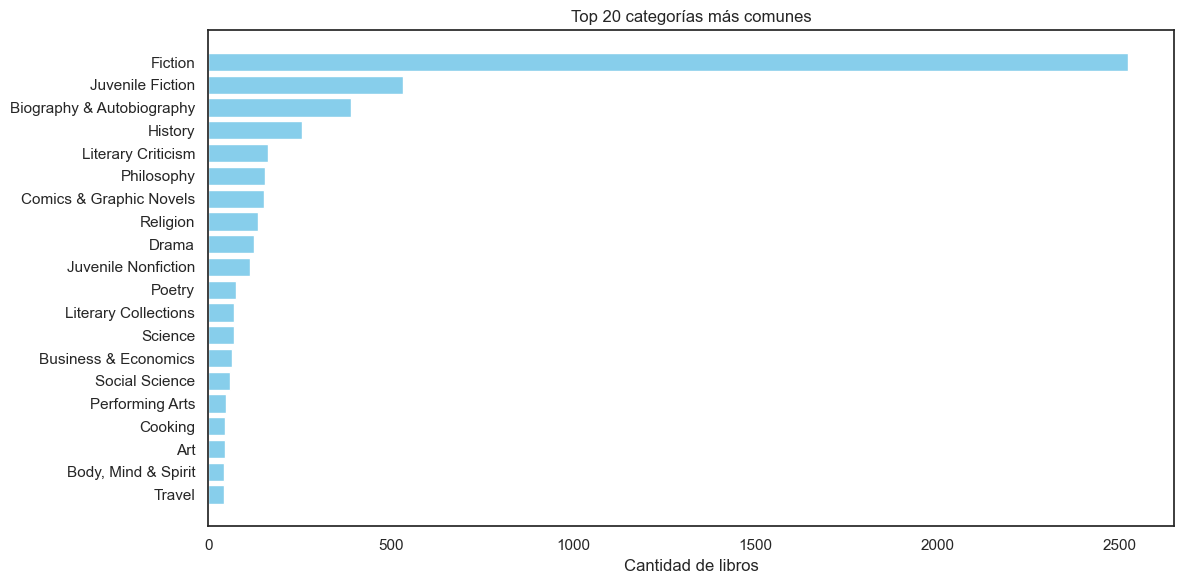

In [ ]:
top_n = 50  # Puedes ajustar este número
df_top = categories_distribution.head(top_n)

plt.figure(figsize=(12, 6))
plt.barh(df_top['categories'], df_top['count'], color='skyblue')
plt.title(f"Top {top_n} categorías más comunes")
plt.xlabel("Cantidad de libros")
plt.gca().invert_yaxis()  # Para que la categoría con más libros quede arriba
plt.tight_layout()
plt.show()